In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Things to vary, number of layers, elevation of the ground surface, thickness of layers, random noise on surfaces

In [4]:
# first is the angular unconformity geometry

In [7]:
elevation = np.full(200, 3.25)  # +np.random.rand(200)/2
first = 3 * np.sin(np.arange(0, 20, 0.1) / 6.28)
second = 3 * np.sin(np.arange(0, 20, 0.1) / 6.28) + 1.5
third = 3 * np.sin(np.arange(0, 20, 0.1) / 6.28) + 1.65

first = np.where(first > elevation, elevation, first)
second = np.where(second > elevation, elevation, second)
third = np.where(third > elevation, elevation, third)

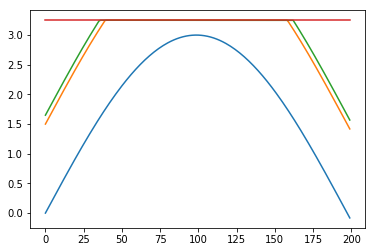

In [8]:
plt.plot(first)
plt.plot(second)
plt.plot(third)
plt.plot(elevation)

In [5]:
df = pd.DataFrame()
df["elevation"] = elevation
df["third"] = third
df["second"] = second
df["firsts"] = first

In [6]:
angular_thicknesses = df.T.diff(axis=0).abs().T
angular_thicknesses["mean"] = angular_thicknesses.copy().mean(axis=1)
angular_thicknesses["third_lag"] = angular_thicknesses.third.shift(1)
angular_thicknesses["second_lag"] = angular_thicknesses.second.shift(1)
angular_thicknesses["first_lag"] = angular_thicknesses.firsts.shift(1)

angular_thicknesses = angular_thicknesses.drop(columns=["elevation"]).dropna()

In [7]:
# now it's onlap geometry

In [8]:
onlap_first = np.where(
    3 * np.sin(np.arange(0, 20, 0.1) / 6.28) > elevation,
    elevation,
    3 * np.sin(np.arange(0, 20, 0.1) / 6.28),
)
onlap_second = np.where(
    np.where(np.full(200, 0.5) > onlap_first, np.full(200, 0.5), onlap_first)
    > elevation,
    elevation,
    np.where(np.full(200, 0.5) > onlap_first, np.full(200, 0.5), onlap_first),
)
onlap_third = np.where(
    np.where(np.full(200, 0.65) > onlap_first, np.full(200, 0.65), onlap_first)
    > elevation,
    elevation,
    np.where(
        np.full(200, 0.65) > onlap_first, np.full(200, 0.65), onlap_first
    ),
)

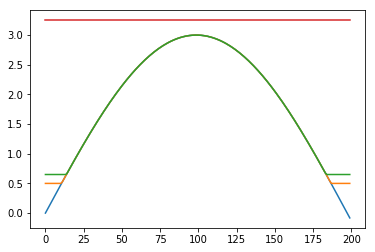

In [9]:
plt.plot(onlap_first)
plt.plot(onlap_second)
plt.plot(onlap_third)
plt.plot(elevation)

In [10]:
dfo = pd.DataFrame()
dfo["elevation"] = elevation
dfo["third"] = onlap_third
dfo["second"] = onlap_second
dfo["firsts"] = onlap_first

In [11]:
onlap_thicknesses = dfo.T.diff(axis=0).abs().T
onlap_thicknesses["mean"] = onlap_thicknesses.copy().mean(axis=1)
onlap_thicknesses["third_lag"] = onlap_thicknesses.third.shift(1)
onlap_thicknesses["second_lag"] = onlap_thicknesses.second.shift(1)
onlap_thicknesses["first_lag"] = onlap_thicknesses.firsts.shift(1)

onlap_thicknesses = onlap_thicknesses.drop(columns=["elevation"]).dropna()

In [12]:
horizontal_first = np.full(200, 0) + np.random.rand(200) / 100
horizontal_second = np.full(200, 0.5) + np.random.rand(200) / 100
horizontal_third = np.full(200, 0.65) + np.random.rand(200) / 100

dfh = pd.DataFrame()
dfh["elevation"] = elevation
dfh["third"] = horizontal_third
dfh["second"] = horizontal_second
dfh["firsts"] = horizontal_first

horizontal_thicknesses = dfh.T.diff(axis=0).abs().T
horizontal_thicknesses["mean"] = horizontal_thicknesses.copy().mean(axis=1)
horizontal_thicknesses["third_lag"] = horizontal_thicknesses.third.shift(1)
horizontal_thicknesses["second_lag"] = horizontal_thicknesses.second.shift(1)
horizontal_thicknesses["first_lag"] = horizontal_thicknesses.firsts.shift(1)

horizontal_thicknesses = horizontal_thicknesses.drop(
    columns=["elevation"]
).dropna()

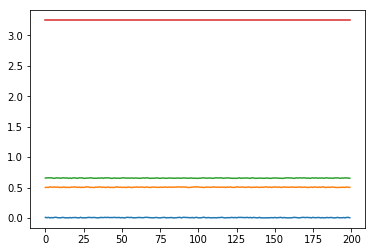

In [13]:
plt.plot(horizontal_first)
plt.plot(horizontal_second)
plt.plot(horizontal_third)
plt.plot(elevation)

In [14]:
normalized_df = (angular_thicknesses - angular_thicknesses.min()) / (
    angular_thicknesses.max() - angular_thicknesses.min()
)
normalized_dfo = (onlap_thicknesses - onlap_thicknesses.min()) / (
    onlap_thicknesses.max() - onlap_thicknesses.min()
)
normalized_dfh = (horizontal_thicknesses - horizontal_thicknesses.min()) / (
    horizontal_thicknesses.max() - horizontal_thicknesses.min()
)

normalized_dfo["class"] = 1
normalized_df["class"] = 0
normalized_dfh["class"] = 2

In [15]:
dataset = pd.concat((normalized_df, normalized_dfo, normalized_dfh))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[0:, 0:7].values,
    dataset.iloc[0:, 7].values,
    test_size=0.1,
    random_state=86,
)

In [17]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
type(y_train_encoded)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


numpy.ndarray

In [18]:
np.argmax(y_train_encoded, axis=1)

array([2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1,
       2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 2, 0,
       0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0,
       1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2,
       1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0,
       2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0,
       0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1,
       0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1,

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [27]:
model = Sequential()
model.add(
    Dense(
        100, input_shape=(7,), kernel_initializer="normal", activation="relu"
    )
)
model.add(Dropout(0.1))
model.add(Dense(3, kernel_initializer="normal", activation="relu"))
model.add(Dense(3, kernel_initializer="normal", activation="sigmoid"))

# Compile model
model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["acc"]
)

In [28]:
model.fit(X_train, y_train_encoded, epochs=200, batch_size=20)

Epoch 1/200
537/537 [==============================] - 0s 652us/step - loss: 1.0981 - acc: 0.3389
Epoch 2/200
537/537 [==============================] - 0s 54us/step - loss: 1.0946 - acc: 0.3464
Epoch 3/200
537/537 [==============================] - 0s 54us/step - loss: 1.0832 - acc: 0.3575
Epoch 4/200
537/537 [==============================] - 0s 53us/step - loss: 1.0548 - acc: 0.5717
Epoch 5/200
537/537 [==============================] - 0s 54us/step - loss: 1.0104 - acc: 0.5531
Epoch 6/200
537/537 [==============================] - 0s 55us/step - loss: 0.9694 - acc: 0.5922
Epoch 7/200
537/537 [==============================] - 0s 56us/step - loss: 0.9390 - acc: 0.6555
Epoch 8/200
537/537 [==============================] - 0s 65us/step - loss: 0.9128 - acc: 0.6685
Epoch 9/200
537/537 [==============================] - 0s 62us/step - loss: 0.8856 - acc: 0.7169
Epoch 10/200
537/537 [==============================] - 0s 52us/step - loss: 0.8533 - acc: 0.7281
Epoch 11/200
537/537 [======

537/537 [==============================] - 0s 50us/step - loss: 0.0791 - acc: 0.9888
Epoch 168/200
537/537 [==============================] - 0s 50us/step - loss: 0.0809 - acc: 0.9795
Epoch 169/200
537/537 [==============================] - 0s 50us/step - loss: 0.0714 - acc: 0.9851
Epoch 170/200
537/537 [==============================] - 0s 48us/step - loss: 0.0786 - acc: 0.9814
Epoch 171/200
537/537 [==============================] - 0s 52us/step - loss: 0.0842 - acc: 0.9814
Epoch 172/200
537/537 [==============================] - 0s 50us/step - loss: 0.0737 - acc: 0.9851
Epoch 173/200
537/537 [==============================] - 0s 50us/step - loss: 0.0768 - acc: 0.9870
Epoch 174/200
537/537 [==============================] - 0s 50us/step - loss: 0.0768 - acc: 0.9795
Epoch 175/200
537/537 [==============================] - 0s 50us/step - loss: 0.0709 - acc: 0.9832
Epoch 176/200
537/537 [==============================] - 0s 50us/step - loss: 0.0786 - acc: 0.9832
Epoch 177/200
537/537 [=

In [29]:
score = model.evaluate(X_test, y_test_encoded)

60/60 [==============================] - 0s 701us/step


In [30]:
score

[0.07630496670802435, 0.9666666547457378]

In [4]:
names = [
    "one",
    "two",
    "three",
    "four",
    "five",
    "six",
    "seven",
    "eight",
    "nine",
    "ten",
    "eleven",
    "twelve",
    "thirteen",
    "fourteen",
    "fifteen",
    "sixteen",
]

In [52]:
number_of_layers = np.random.randint(0, 6)

In [53]:
names[0:number_of_layers]

['one', 'two', 'three', 'four', 'five']

In [145]:
df = pd.DataFrame()

for j in np.arange(3, 5.5, 0.1):
    rolling = pd.DataFrame()
    rolling["zero"] = np.full(200, 0) - np.random.rand(200) / 10
    for i in range(len(names[0:number_of_layers])):
        randomness = np.random.uniform(0, i)
        rolling[names[i]] = (
            np.full(200, randomness) + np.random.rand(200) / 100
        )
    df = pd.concat((df, rolling))

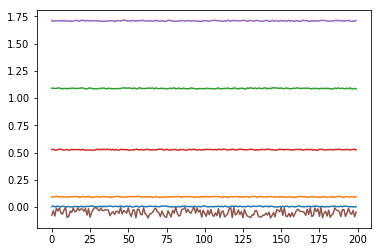

In [146]:
plt.plot(df["one"].values[0:200])
plt.plot(df["two"].values[0:200])
plt.plot(df["three"].values[0:200])
plt.plot(df["four"].values[0:200])
plt.plot(df["five"].values[0:200])
plt.plot(df["zero"].values[0:200])

In [149]:
horizontal_thicknesses = df.T.diff(axis=0).abs().T
neigh = horizontal_thicknesses.shift(5)
logged = horizontal_thicknesses.apply(np.log)
powered = horizontal_thicknesses.apply(lambda x: x ** 10)

horizontal_thicknesses = (
    pd.concat(
        [horizontal_thicknesses, neigh, logged, powered],
        axis=1,
        join_axes=[horizontal_thicknesses.index],
    )
    .drop(columns=["zero"])
    .dropna()
    .replace(-np.inf, 0)
)

In [150]:
horizontal_thicknesses

,one,two,three,four,five,one,two,three,four,five,one,two,three,four,five,one,two,three,four,five
5,0.014411,0.085368,1.003542,0.562219,1.176678,0.077452,0.089644,0.997240,0.563864,1.185880,-4.239779,-2.460789,0.003535,-0.575865,0.162695,3.862530e-19,2.055555e-11,1.035985,0.003155,5.088330
6,0.055234,0.094912,0.991595,0.557815,1.178293,0.043545,0.081121,0.999651,0.559545,1.173507,-2.896173,-2.354800,-0.008440,-0.583729,0.164067,2.642899e-13,5.932443e-11,0.919060,0.002917,5.158609
7,0.074679,0.084725,0.990776,0.558664,1.186622,0.083708,0.094600,0.992013,0.565936,1.186893,-2.594563,-2.468347,-0.009267,-0.582208,0.171111,5.394572e-12,1.905916e-11,0.911495,0.002961,5.535103
8,0.031592,0.087317,0.998162,0.568627,1.183109,0.015738,0.088868,0.993892,0.565886,1.185035,-3.454863,-2.438205,-0.001840,-0.564531,0.168146,9.901938e-16,2.576373e-11,0.981770,0.003534,5.373389
9,0.008854,0.088172,0.995196,0.560378,1.185777,0.043324,0.090531,0.994964,0.566084,1.181865,-4.726853,-2.428468,-0.004815,-0.579144,0.170398,2.961689e-21,2.839853e-11,0.952987,0.003054,5.495769
10,0.098159,0.091041,0.992875,0.558256,1.176808,0.014411,0.085368,1.003542,0.562219,1.176678,-2.321170,-2.396442,-0.007150,-0.582937,0.162806,8.304002e-11,3.911856e-11,0.930992,0.002940,5.093983
11,0.092988,0.084312,0.999445,0.567117,1.186556,0.055234,0.094912,0.991595,0.557815,1.178293,-2.375285,-2.473226,-0.000555,-0.567189,0.171055,4.833595e-11,1.815157e-11,0.994464,0.003441,5.531991
12,0.038334,0.095511,0.990920,0.565274,1.183847,0.074679,0.084725,0.990776,0.558664,1.186622,-3.261414,-2.348511,-0.009121,-0.570444,0.168769,6.852652e-15,6.317526e-11,0.912822,0.003331,5.406982
13,0.051628,0.093363,0.996765,0.561148,1.175004,0.031592,0.087317,0.998162,0.568627,1.183109,-2.963697,-2.371265,-0.003241,-0.577770,0.161271,1.345328e-13,5.031846e-11,0.968113,0.003096,5.016401
14,0.009297,0.093710,0.997023,0.565374,1.181666,0.008854,0.088172,0.995196,0.560378,1.185777,-4.678027,-2.367551,-0.002982,-0.570268,0.166925,4.825983e-21,5.222241e-11,0.970624,0.003337,5.308183
